## Historical Financials Examples

#### Importing Dependencies

In [1]:
import tradingeconomics as te
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time

#### API login

In [2]:
te.login(); # Signup for a free API key at https://developer.tradingeconomics.com/

## Example 1 - Historical Current Assets and Current Liabilities

### Getting the Data

##### Method: getHistoricalFinancials(symbol=None, category=None, output_type=None):

In [3]:
raw_data_microsoft_current_assets = te.getHistoricalFinancials(symbol='msft:us', category='current-assets', output_type='df')
raw_data_microsoft_current_liabilities = te.getHistoricalFinancials(symbol='msft:us', category='current-liabilities', output_type='df')



### Plotting

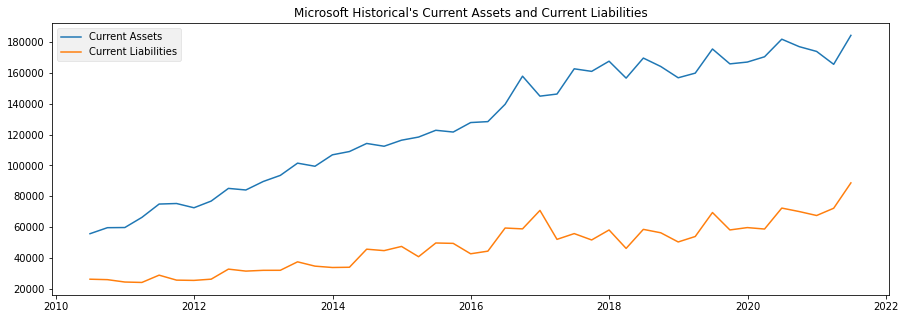

In [4]:
fix, ax = plt.subplots(figsize=(15,5))

x_current_assets = pd.to_datetime(raw_data_microsoft_current_assets['date'], format='%Y-%m-%d')
y_current_assets = raw_data_microsoft_current_assets['value']

x_current_liabilities = pd.to_datetime(raw_data_microsoft_current_liabilities['date'], format='%Y-%m-%d')
y_current_liabilities = raw_data_microsoft_current_liabilities['value']


ax.plot(x_current_assets, y_current_assets, label='Current Assets')
ax.plot(x_current_liabilities, y_current_liabilities, label='Current Liabilities')
ax.set_title("Microsoft Historical's Current Assets and Current Liabilities")
plt.style.use('bmh')
ax.legend()

## Example 2 - Microsoft Liquidity Ratio Performance

### Manipulating Data 

In [5]:
x_current_assets = pd.to_datetime(raw_data_microsoft_current_assets['date'], format='%Y-%m-%d')
y_current_assets = raw_data_microsoft_current_assets['value']

x_current_liabilities = pd.to_datetime(raw_data_microsoft_current_liabilities['date'], format='%Y-%m-%d')
y_current_liabilities = raw_data_microsoft_current_liabilities['value']

y_liquidity_ratio = y_current_assets / y_current_liabilities

### Plotting

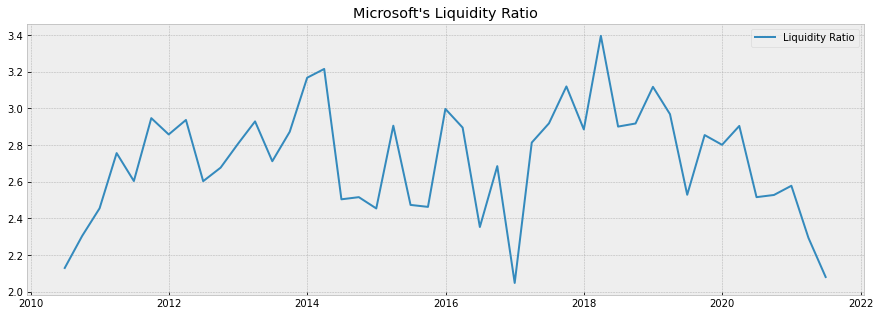

In [6]:
fix, ax2 = plt.subplots(figsize=(15,5))
ax2.plot(x_current_assets, y_liquidity_ratio, label='Liquidity Ratio')
#ax2.plot(x_current_liabilities, y_current_liabilities, label='Current Liabilities')
ax2.set_title("Microsoft's Liquidity Ratio")
plt.style.use('bmh')
ax2.legend()

## Example 3 - Microsoft's Profitability / Performance Ratio


### Getting the Data


In [7]:
raw_data_microsoft_current_profits = te.getHistoricalFinancials(symbol='msft:us', category='gross-profit-on-sales', output_type='df')
raw_data_microsoft_current_sales = te.getHistoricalFinancials(symbol='msft:us', category='sales', output_type='df')


### Manipulating the data


In [8]:
x_microsoft_current_profitability = pd.to_datetime(raw_data_microsoft_current_profits['date'], format='%Y-%m-%d')
y_microsoft_current_profits = raw_data_microsoft_current_profits['value']
y_microsoft_current_sales = raw_data_microsoft_current_sales['value']
y_microsoft_current_profitability = y_microsoft_current_profits / y_microsoft_current_sales


### Plotting

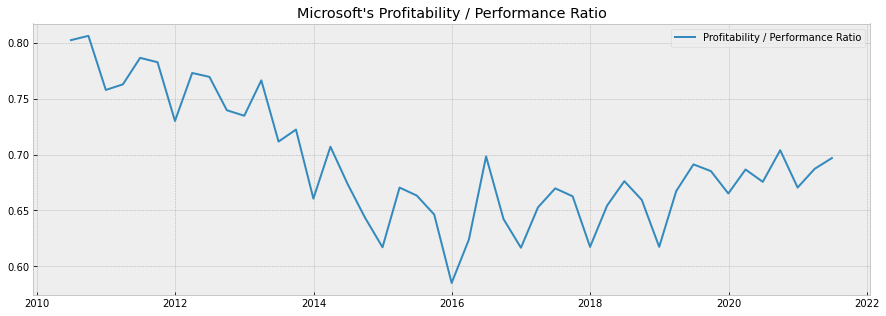

In [9]:
fix, ax3 = plt.subplots(figsize=(15,5))

ax3.plot(x_microsoft_current_profitability, y_microsoft_current_profitability, label='Profitability / Performance Ratio')
ax3.set_title("Microsoft's Profitability / Performance Ratio")
plt.style.use('bmh')
ax3.legend()

## Example 4 - Liquidity's Ratio Comparison


In [10]:
def getCurrentData(companies_symbols_list, category):
    companies_list_data = []
    for company_symbol in companies_symbols_list:
        time.sleep(0.1)
        companies_list_data.append(te.getHistoricalFinancials(symbol=company_symbol, category=category, output_type='df'))
        
    return companies_list_data

def calculateLiquidity(companies_list_assets, companies_list_liabilities):
    companies_list_liquidity = []
    counter = 0
    for company_assets in companies_list_assets:
        companies_list_liquidity.append(company_assets['value'] / companies_list_liabilities[counter]['value'])
        counter +=1
    return companies_list_liquidity

def getX_Axis_list(companies_list_assets):
    x_axis_list = []
    for company_assets1 in companies_list_assets:

        company_assets = company_assets1['date']
        company_assets = (pd.to_datetime(company_assets, format='%Y-%m-%d'))

        x_axis_list.append(company_assets)
    return x_axis_list

def plotLiquidity(companies_list_assets, companies_list_liquidity, companies_symbols_list):
    fix, ax5 = plt.subplots(figsize=(15,5))
    
    x_axis_list = getX_Axis_list(companies_list_assets)

    counter = 0
    for company_liquidity in companies_list_liquidity:
        ax5.plot(x_axis_list[counter], company_liquidity, label=companies_symbols_list[counter])
        counter +=1
    
    ax5.set_title("Liquidity Ratio")
    plt.style.use('bmh')
    ax5.legend()

def getLiquidityRatio(companies_symbols_list):
    
    companies_list_assets = getCurrentData(companies_symbols_list, 'current-assets') 
    companies_list_liabilities = getCurrentData(companies_symbols_list, 'current-liabilities')
    companies_list_liquidity = calculateLiquidity(companies_list_assets, companies_list_liabilities)
    
    plotLiquidity(companies_list_assets, companies_list_liquidity, companies_symbols_list)

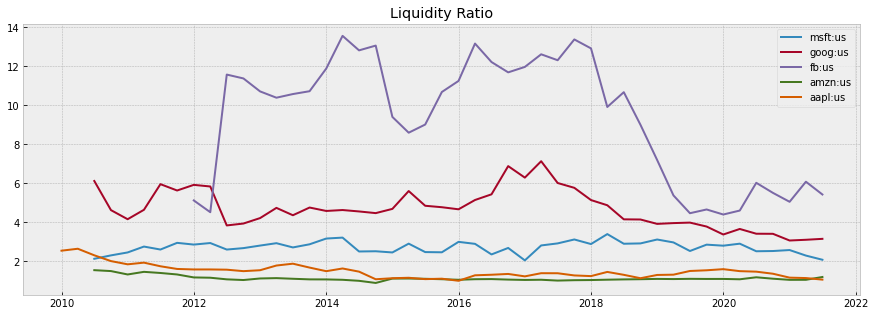

In [11]:
getLiquidityRatio(['msft:us', 'goog:us', 'fb:us', 'amzn:us', 'aapl:us'])

## Example 5 - Profitability Ratio Comparison

In [12]:
def plotProfitability(companies_dataframes_list,companies_symbols_list):
    fix, ax6 = plt.subplots(figsize=(15,5))
    
    plot_counter = 0
    for company_dataframe in companies_dataframes_list:
        ax6.plot(company_dataframe['date'].astype('datetime64'), company_dataframe['profitability'],  label=companies_symbols_list[plot_counter] ) 
        plot_counter +=1
    
    ax6.set_title("Profitability Ratio")
    plt.style.use('bmh')
    ax6.legend()


def getProfitabilityDataframe(profit_converted_dataframe, sales_converted_dataframe):
    profit_sales_dataframe = profit_converted_dataframe[['date','real_value']]
    profit_sales_dataframe = profit_sales_dataframe.rename(columns={'real_value': 'profit'})
    
    profit_sales_dataframe['sales'] = sales_converted_dataframe[['real_value']]
    profit_sales_dataframe = profit_sales_dataframe.assign(profitability = profit_sales_dataframe['profit'] / profit_sales_dataframe['sales'])
    return profit_sales_dataframe

def getConvertedDataFrame(dataframe, unit):
    dataframe['unit'] = unit
    dataframe = dataframe.assign(real_value=dataframe['value'].astype('string') + dataframe['unit'])
    dataframe['real_value'] = dataframe['real_value'].astype('float')
    return dataframe
    
    

def getUnit(company_symbol, financialSymbol):
    time.sleep(0.5)
    raw_data = te.getFinancialsData(symbol=company_symbol, output_type='df')
    return raw_data.query(f'financialSymbol =="{financialSymbol}"')['unit']

def getDataAndConvert(company_symbol, category):
    unit = getUnit(company_symbol, category)
    time.sleep(0.5)
    data_frame = te.getHistoricalFinancials(symbol=company_symbol, category=category, output_type='df')
    converted_data_frame = getConvertedDataFrame(data_frame, unit.values[0])
    return converted_data_frame

def getCompanyDataFrame(company_symbol):
    time.sleep(0.5)
    profit_converted_dataframe = getDataAndConvert(company_symbol, 'gross-profit-on-sales')
    
    time.sleep(0.5)
    sales_converted_dataframe = getDataAndConvert(company_symbol, 'sales')
    
    time.sleep(0.5)
    profitability_dataframe = getProfitabilityDataframe(profit_converted_dataframe, sales_converted_dataframe)
    
    return profitability_dataframe
    
    

def getCompaniesProfitability(companies_symbols_list):
    
    companies_dataframes_list = []
    
    for company_symbol in companies_symbols_list:
        companies_dataframes_list.append(getCompanyDataFrame(company_symbol))
    
    plotProfitability(companies_dataframes_list, companies_symbols_list)
    

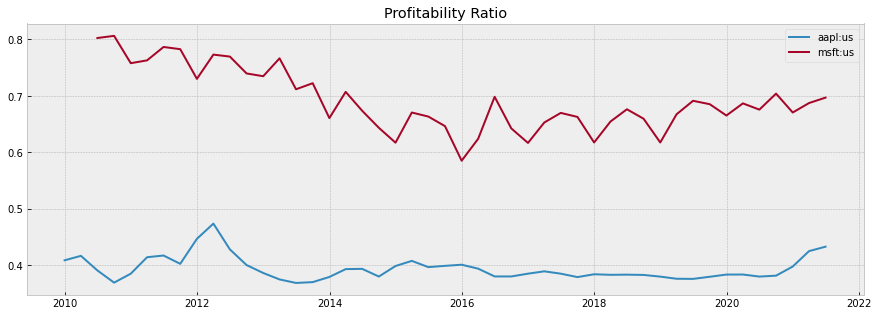

In [13]:
companies_symbols_list = ['aapl:us','msft:us']
getCompaniesProfitability(companies_symbols_list)